# ABOUT


Datascientest's Datascientist continuous bootcamp - cohorte Mars2022 -  AeroBOT project

**Tutor**

* Alban THUET

**Authors:**

* Hélène ASSIR
* Hichem HADJI  
* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author(s)  | Modification
--------|----------- | ---------  | --------------------------
1.1     | 20/09/2022 | H.A.       | Plot title with \n 
1.0     | 24/08/2022 | H.A.       | Plots metrics by model with dataviz

# IMPORT PACKAGES


In [1]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns
import math # for math.pi etc.
import time # time code execution

#######################
# Pandas
#######################
import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.colheader_justify","left") # left-justify the print output of pandas

### Display full columnwidth
# Set pandas settings to display full text columns
#pd.options.display.max_colwidth = None
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

import itertools # Pour créer des iterateurs

# Package to show the progression of pandas operations
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()
# simply use .progress_apply() instead of .apply() on your pd.DataFram

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline


###############################
# Other
###############################
import pickle as pkl # Saving data externally

# LOAD DATA

## Mount GDrive

In [2]:
#@title
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#check your present working directory 
%pwd

Mounted at /content/drive/


'/content'

In [3]:
#@title
# move to the transformed data location (you can create a deeper structure, if needed, e.g. to save a trained model):
%cd /content/drive/MyDrive/data/transformed/

/content/drive/MyDrive/data/transformed


In [4]:
#@title
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

 2022_09_11_7_4_3_raw_narr_BERT_BASE_frozen_max_length_345.pkl
 complaints-2022-08-05_13_55.csv
'Copy of Qualified abbreviations_20220718.xlsx.gsheet'
'Data Dictionnary.xlsx'
 data_for_BERT_multilabel_20220805.pkl
 logs
 model.png
 model_results
 Narrative_PP_stemmed_24072022_TRAIN.pkl
 Narrative_Raw_Stemmed_24072022_TRAIN.pkl
 Narrative_RegEx_subst_21072022_TRAIN.pkl
'Qualified abbreviations_20220707_test.csv'
'Qualified abbreviations_20220708.csv'
'Qualified abbreviations_20220718.csv'
'Qualified abbreviations_20220718_Google_sheet.gsheet'
 test_data_final.pkl
 train_data_final.pkl


## Load 1 VS ALL dataframes from .pkl file 
- 1 vs all  classification report format


In [5]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results/Importance_Feature_Selection/

filename_list = [
                 'df_metrics_DT_PP.pkl', 
                    'df_metrics_DT_PP_Impce_1000.pkl',
                    'df_metrics_DT_PP_Impce_750.pkl',
                    'df_metrics_DT_PP_Impce_500.pkl',
                    'df_metrics_DT_PP_Impce_250.pkl',
                    'df_metrics_DT_PP_Impce_100.pkl',
                    'df_metrics_DT_PP_Impce_50.pkl',
                    'df_metrics_DT_PP_Impce_30.pkl',
                    'df_metrics_DT_PP_Impce_20.pkl',
                  'df_metrics_GB_PP_RN_MDF.pkl',   
                    'df_metrics_GB_PP_Impce_1000.pkl',
                    'df_metrics_GB_PP_Impce_750.pkl',
                    'df_metrics_GB_PP_Impce_500.pkl',
                    'df_metrics_GB_PP_Impce_250.pkl',
                    'df_metrics_GB_PP_Impce_100.pkl',
                    'df_metrics_GB_PP_Impce_50.pkl',
                    'df_metrics_GB_PP_Impce_30.pkl',
                    'df_metrics_GB_PP_Impce_20.pkl',
                'df_metrics_GB_PP_US_RN_MDF.pkl', 
                    'df_metrics_GB_PP_US_Impce_1000.pkl',
                    'df_metrics_GB_PP_US_Impce_750.pkl',
                    'df_metrics_GB_PP_US_Impce_500.pkl',
                    'df_metrics_GB_PP_US_Impce_250.pkl',
                    'df_metrics_GB_PP_US_Impce_100.pkl',
                    'df_metrics_GB_PP_US_Impce_50.pkl',
                    'df_metrics_GB_PP_US_Impce_30.pkl',
                    'df_metrics_GB_PP_US_Impce_20.pkl',
               'df_metrics_RF_PP_RN_MDF.pkl', 
                    'df_metrics_RF_PP_Impce_1000.pkl',
                    'df_metrics_RF_PP_Impce_750.pkl',
                    'df_metrics_RF_PP_Impce_500.pkl',
                    'df_metrics_RF_PP_Impce_250.pkl',
                    'df_metrics_RF_PP_Impce_100.pkl',
                    'df_metrics_RF_PP_Impce_50.pkl',
                    'df_metrics_RF_PP_Impce_30.pkl',
                    'df_metrics_RF_PP_Impce_20.pkl',
                 'df_metrics_RF_PP_US_RN_MDF.pkl',
                    'df_metrics_RF_PP_US_Impce_1000.pkl',
                    'df_metrics_RF_PP_US_Impce_750.pkl',    
                    'df_metrics_RF_PP_US_Impce_500.pkl',                                                                   
                    'df_metrics_RF_PP_US_Impce_250.pkl',
                    'df_metrics_RF_PP_US_Impce_100.pkl',
                    'df_metrics_RF_PP_US_Impce_50.pkl',
                    'df_metrics_RF_PP_US_Impce_30.pkl',
                    'df_metrics_RF_PP_US_Impce_20.pkl',

                 'metrics_WordEmbedding_PP_20220727_2200.pkl'
                 ]

df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results_1vsall = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_1vsall = model_results_1vsall.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results/Importance_Feature_Selection
Files ['df_metrics_DT_PP.pkl', 'df_metrics_DT_PP_Impce_1000.pkl', 'df_metrics_DT_PP_Impce_750.pkl', 'df_metrics_DT_PP_Impce_500.pkl', 'df_metrics_DT_PP_Impce_250.pkl', 'df_metrics_DT_PP_Impce_100.pkl', 'df_metrics_DT_PP_Impce_50.pkl', 'df_metrics_DT_PP_Impce_30.pkl', 'df_metrics_DT_PP_Impce_20.pkl', 'df_metrics_GB_PP_RN_MDF.pkl', 'df_metrics_GB_PP_Impce_1000.pkl', 'df_metrics_GB_PP_Impce_750.pkl', 'df_metrics_GB_PP_Impce_500.pkl', 'df_metrics_GB_PP_Impce_250.pkl', 'df_metrics_GB_PP_Impce_100.pkl', 'df_metrics_GB_PP_Impce_50.pkl', 'df_metrics_GB_PP_Impce_30.pkl', 'df_metrics_GB_PP_Impce_20.pkl', 'df_metrics_GB_PP_US_RN_MDF.pkl', 'df_metrics_GB_PP_US_Impce_1000.pkl', 'df_metrics_GB_PP_US_Impce_750.pkl', 'df_metrics_GB_PP_US_Impce_500.pkl', 'df_metrics_GB_PP_US_Impce_250.pkl', 'df_metrics_GB_PP_US_Impce_100.pkl', 'df_metrics_GB_PP_US_Impce_50.pkl', 'df_metrics_GB_PP_US_Impce_30.pkl', 'df_metrics_GB_PP_US_Im

In [6]:
# Check of the df length ; for each model : must contain 4 metrics rows for each of the 14 anomalies 
print('Check of df size :',len(model_results_1vsall), ' must be equal to ',14*4*len(filename_list))

Check of df size : 2576  must be equal to  2576


In [7]:
model_results_1vsall.head()


,classifier,preprocessing,undersampling,Count_Vectorizer_opts,anomaly,metric,0,1,accuracy,macro avg,weighted avg
0,Decision Tree,1,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,precision,0.647695,0.702428,0.686514,0.675061,0.680569
1,Decision Tree,1,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,recall,0.471537,0.829457,0.686514,0.650497,0.686514
2,Decision Tree,1,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.545753,0.760675,0.686514,0.653214,0.674842
3,Decision Tree,1,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,support,7747.000000,11651.000000,0.686514,19398.000000,19398.000000
4,Decision Tree,1,0,NaN,Anomaly_Aircraft Equipment,precision,0.848105,0.816620,0.836581,0.832363,0.835662


### Transform in Common format : 

In [8]:
# label of the model , including options
model_results_1vsall['model_label']=model_results_1vsall['classifier']+'/'+model_results_1vsall['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP')+'/'+model_results_1vsall['undersampling'].apply(lambda x: 'Std sampling' if x==0 else 'Under sampling') +'/'+model_results_1vsall['Count_Vectorizer_opts'].apply(lambda x: '' if str(x)=='nan' else str(x))
      

In [9]:
model_results_1vsall_select=model_results_1vsall[['model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

In [10]:
model_results_1vsall_select.head()

,model_label,classifier,preprocessing,undersampling,anomaly,metric,1
0,Decision Tree/PP/Std sampling/,Decision Tree,1,0,Anomaly_Deviation / Discrepancy - Procedural,precision,0.702428
1,Decision Tree/PP/Std sampling/,Decision Tree,1,0,Anomaly_Deviation / Discrepancy - Procedural,recall,0.829457
2,Decision Tree/PP/Std sampling/,Decision Tree,1,0,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.760675
3,Decision Tree/PP/Std sampling/,Decision Tree,1,0,Anomaly_Deviation / Discrepancy - Procedural,support,11651.000000
4,Decision Tree/PP/Std sampling/,Decision Tree,1,0,Anomaly_Aircraft Equipment,precision,0.816620


## Load MULTILABEL DataFrames from .pkl files
- Multilabel  classification report / word embedding options format

In [11]:
def get_filenames_in_dir(dir, extension = '.pkl', include_path = False):
  '''
  Find all .pkl (or other format's) files in the directory and create a list with their names
  
  Input: 
  - directory
  - file extension type
  - include_path: whether to include the entire path in the filename; default: False
  
  Return:
  - list of .pkl
  '''
  import os
  files_to_import = []
  # traverse whole directory
  for root, dirs, files in os.walk(dir):
      # select file name
      for file in files:
          # check the extension of files
          if file.endswith(extension):
            if include_path == True:
              files_to_import.append(os.path.join(root, file)) # print whole path of files
            else:  
              files_to_import.append(os.path.join('', file))
  
  return files_to_import

In [12]:
# Import DataFrames into a list 'files_to_import'
dir = '/content/drive/MyDrive/data/saved models/Yannis/2022_08_19_WordEmbedding_Multilabel_PADDING_tests/'
%cd $dir
# the '$' extracts the value from the string. Don't put any comments in the line above

files_to_import = get_filenames_in_dir(dir, extension = '.pkl', include_path = False)

/content/drive/MyDrive/data/saved models/Yannis/2022_08_19_WordEmbedding_Multilabel_PADDING_tests


In [13]:
# # Manually select the files to import
# # e.g. if you want to plot only specific models

# files_to_import = [\
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_20000_MAXLEN_200_PAD_post_TRUNC_post.pkl',
#  '2022_08_19_WordEmbedding_Multilabel_vocab_size_20000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl'
#  ]

In [14]:
# Combine all DataFrames into one, named 'model_results'

df_list = []

for filename in files_to_import:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[3]) # [3] corresponds to clf_rep_df (classification report in pd.DataFrame format)

print(f"Files {files_to_import} loaded")
  
model_results_multilabel = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results_multilabel = model_results_multilabel.reset_index().drop(columns =['index'])

Files ['2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_50_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_3000_MAXLEN_400_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_9000_MAXLEN_200_PAD_pre_TRUNC_pre.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_500_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmbedding_Multilabel_vocab_size_1000_MAXLEN_200_PAD_post_TRUNC_post.pkl', '2022_08_19_WordEmb

In [15]:
# For compatibility with the function below, rename the 'values' column into 'macro avg'
model_results_multilabel = model_results_multilabel.rename(columns = {'values': '1'})

In [16]:
model_results_multilabel.head(5)

,classifier,preprocessing,undersampling,anomaly,num_words,maxlen,padding,truncating,metric,1
0,Word_Embedding,1,0,Anomaly_Aircraft Equipment,3000,200,post,post,precision,0.877740
1,Word_Embedding,1,0,Anomaly_Aircraft Equipment,3000,200,post,post,recall,0.851291
2,Word_Embedding,1,0,Anomaly_Aircraft Equipment,3000,200,post,post,f1-score,0.864314
3,Word_Embedding,1,0,Anomaly_Aircraft Equipment,3000,200,post,post,support,7666.000000
4,Word_Embedding,1,0,Anomaly_Airspace Violation,3000,200,post,post,precision,0.805112


### Transform in Common format : 

In [17]:
# label of the model , including options
model_results_multilabel['model_label'] = model_results_multilabel['classifier']                                                                   \
                            + '_'                                                                                    \
                            + model_results_multilabel['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP')                       \
                            + '_'                                                                                    \
                            + model_results_multilabel['maxlen'].apply(lambda x: '' if x == np.nan else 'maxlen:' + str(x))            \
                            + '_'                                                                                    \
                            + model_results_multilabel['num_words'].apply(lambda x: '' if x == np.nan else 'vocab_size:' + str(x))     \
                            + '_'+model_results_multilabel['padding'].apply(lambda x: '' if str(x)=='nan' else 'pad:'+ str(x).upper()) \
                            + '_'+model_results_multilabel['truncating'].apply(lambda x: '' if str(x)=='nan' else 'trunc:'+ str(x).upper())
      ############################################

      

In [18]:
model_results_multilabel_select=model_results_multilabel[['model_label','classifier','preprocessing','undersampling','anomaly','metric','1']]

## Concatenate 1 VS ALL &  MULTILABEL

In [19]:
model_results=pd.concat([model_results_1vsall_select, model_results_multilabel_select] , axis=0)

In [20]:
print(len(model_results_1vsall_select))
print(len(model_results_multilabel_select))
print(len(model_results))


2576
784
3360


# Plot of F1 score (Macro avg) 

#### Function plot_metric 

In [21]:
def plot_metric_universal(df_model_results,anomaly_list=[],metric="f1-score",dict_model_color={}):
    """
    Plots, for each anomaly, the evolution of  "metric" 
    Inputs: 
    - model_results : a df containing the classification report metrics of our different "models" to plot
      Models include : classifier type and modeling options such as  raw/PP narratives, std or under sampling, count_vectorizer options
    - a list of anomaly features : if the list is empty : 
    - metric : one of the model results metrics : "precision", "recall", "f1-score" or "support"
    - dict_color : dictionnary defining a color for each type of model listed (grey if non listed)
    
    Returns:
    - 1 plot per anomaly listed
      - for models using undersampling, the line  of the rectangle is thiner
      - for models using raw narratives (vs PP), the line  of the rectangle is grey instead of black

    """
    if anomaly_list==[] :
      anomaly_list=df_model_results['anomaly'].unique().tolist()
    for anomaly in anomaly_list :
  
      # Anomaly_label without the prefix "Anomaly_"
      anomaly_label=anomaly.replace("Anomaly_", "")  
      
      # Dealing with rows and columns to use according to the metric choice (accuracy is a column not a row) + graph title
      # if metric=="accuracy":
      #   modality_col="accuracy"
      #   metric_row="support"
      #   title_ToPlot=anomaly_label+" :  accuracy"
      # elif modality=="macro avg":
      #    modality_col=modality
      #    metric_row=metric
      #    title_ToPlot=anomaly_label+" :  "+ metric+"(macro avg)"
      # else :
      modality_col='1'
      metric_row=metric
      title_ToPlot=anomaly_label+" :\n  "+ metric+" (modality=1) "



      # dataframe containing only the rows to plot
      sub_df = df_model_results[(df_model_results['anomaly'] == anomaly) & (df_model_results['metric'] == metric_row)] .copy()
      # label of the model , including options
      sub_df=sub_df.set_index('model_label')
      # defining color, edgecolot, linewidth of the bar according to the model characteristics
      sub_df['color']=sub_df['classifier'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
      sub_df['edgecolor']=sub_df['preprocessing'].apply(lambda x: 'grey' if x==0 else 'black')
      sub_df['linewidth']=sub_df['undersampling'].apply(lambda x: 3 if x==0 else 1)
      
      # Plot
      fig = plt.figure()
      plt.style.use('ggplot')
      plt.rcParams['axes.titlesize'] = 15
      plt.rcParams['axes.labelsize'] = 10
      plt.rcParams['xtick.labelsize'] = 10
      plt.rcParams['ytick.labelsize'] = 13
      plt.rc('legend', fontsize=10)    # legend fontsize



      
      num_classes = len(sub_df)

      colors=list(sub_df['color'])
      edgecolors=list(sub_df['edgecolor'])
      linewidths=list(sub_df['linewidth'])
      iter_color = iter(colors)

      sub_df[modality_col].plot.barh(title=title_ToPlot, 
                                                      ylabel="Topics",
                                                      color=colors,
                                                      edgecolor=edgecolors,
                                                      linewidth=linewidths,
                                                      figsize=(6,12))
      if metric!="support":
        plt.xlim([0,1])
        plt.xticks([])
        for i, v in enumerate(sub_df[modality_col]):
          c = next(iter_color)
          plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                  " "+str(round(v*100,1))+"%", 
                  color=c, 
                  va='center', 
                  fontweight='bold')
      else : 
          for i, v in enumerate(sub_df[modality_col]):
            c = next(iter_color)
            plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                    " "+str(int(v)), 
                    color=c, 
                    va='center', 
                    fontweight='bold')


#### Plotting f1-score macro avg for each anomaly

In [22]:
# Definition of color coding for each model type (grey otherwise in function)
dict_model_color={'Decision Tree':'#15B01A' , 
            'Random Forest':'#008080' , 
            'Gradient Boosting':'#16a3e0' , 
            'SVM':'#162d5a' , 
            'Neural Network':'#f14124' , 
            'Word_Embedding':'#962c61'  }

##### Example for all anomalies, 1 metric

In [23]:
plot_metric_universal(df_model_results=model_results,metric="f1-score",dict_model_color=dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

##### Example for 1 anomaly all metrics

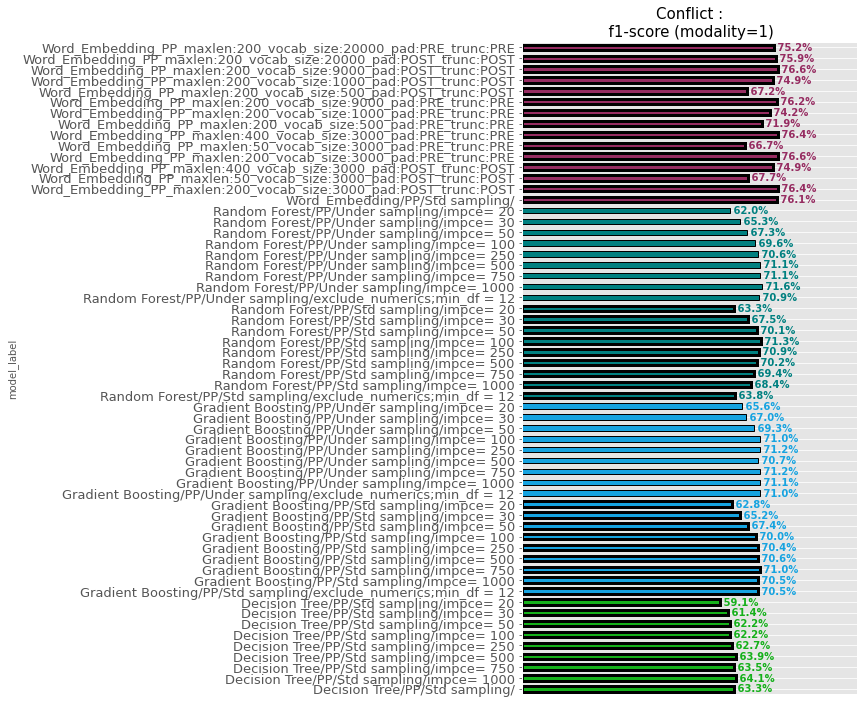

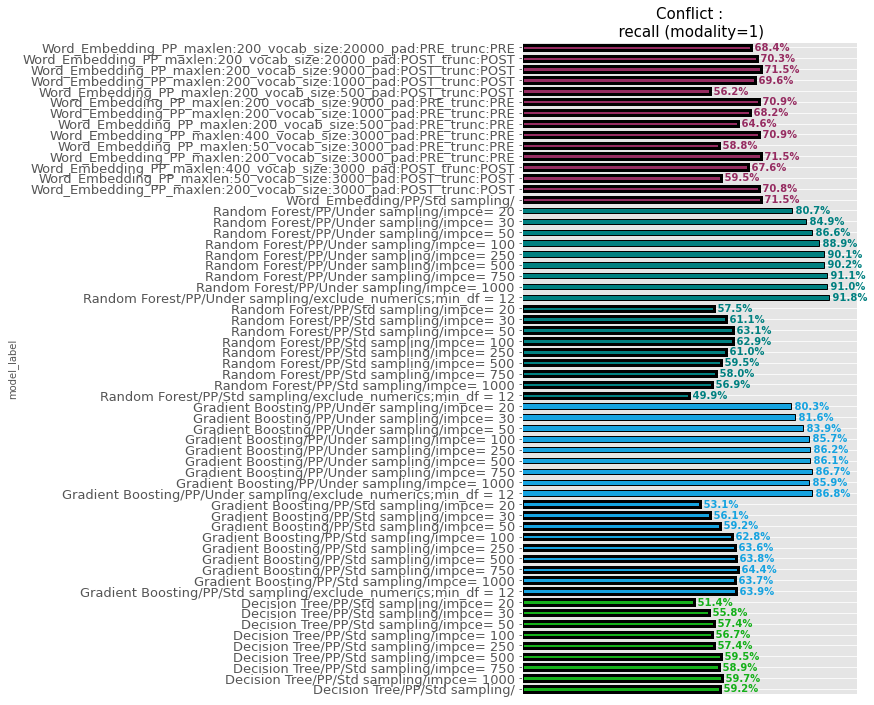

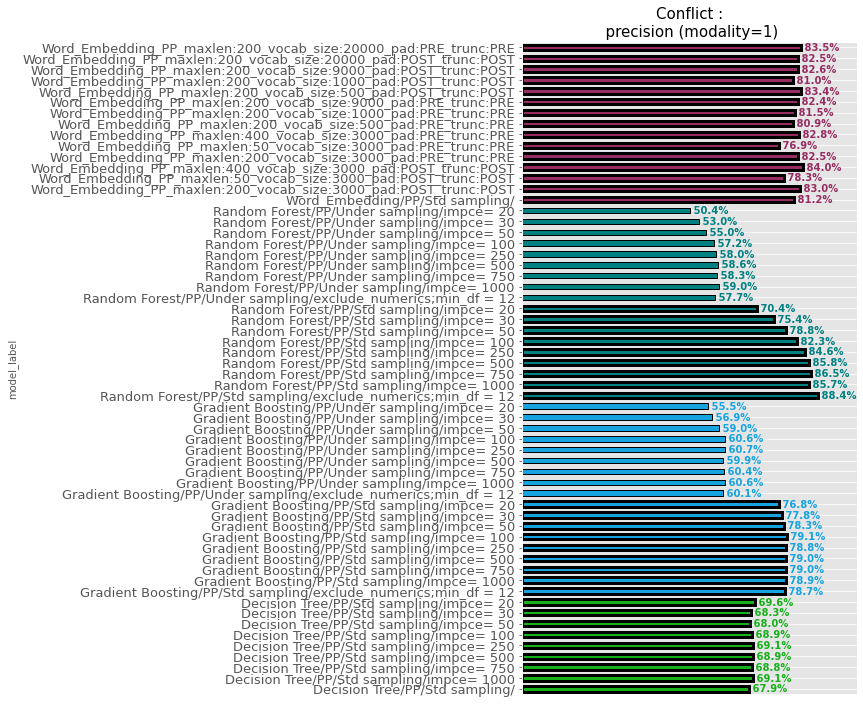

In [24]:
#anomaly='Anomaly_Aircraft Equipment'
anomaly='Anomaly_Conflict'
plot_metric_universal(df_model_results=model_results,anomaly_list=[anomaly],metric="f1-score",dict_model_color=dict_model_color)
plot_metric_universal(df_model_results=model_results,anomaly_list=[anomaly],metric="recall",dict_model_color=dict_model_color)
plot_metric_universal(df_model_results=model_results,anomaly_list=[anomaly],metric="precision",dict_model_color=dict_model_color)